# Importing Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [5]:
data=pd.read_csv("Advertising Budget and Sales.csv")
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:

data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Preprocessing

In [7]:

data.ndim


2

In [8]:

data.size

800

In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:

data.isnull().sum()

,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


In [11]:
data.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
data.corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


It is evident from the above output that advertisements through TV is very effective and helps boost sales followed by advertisement through Radio and Newspaper. Further, correlation ratio for Newspaper to Sales is 0.228 which represents the correlation is very weak - Newspaper advertisements have hardly made any impact on sales

# Data Visualization

<Axes: >

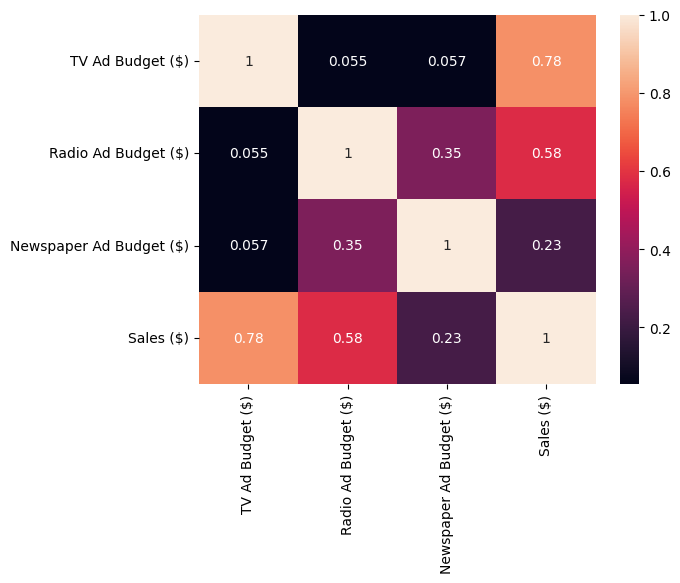

In [13]:

sns.heatmap(data.corr(),annot=True)

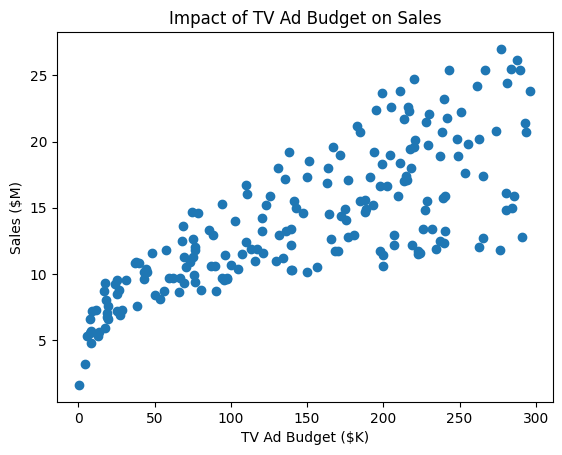

In [14]:

plt.scatter(data['TV Ad Budget ($)'],data['Sales ($)'])
plt.xlabel('TV Ad Budget ($K)')
plt.ylabel('Sales ($M)')
plt.title('Impact of TV Ad Budget on Sales')
plt.show()

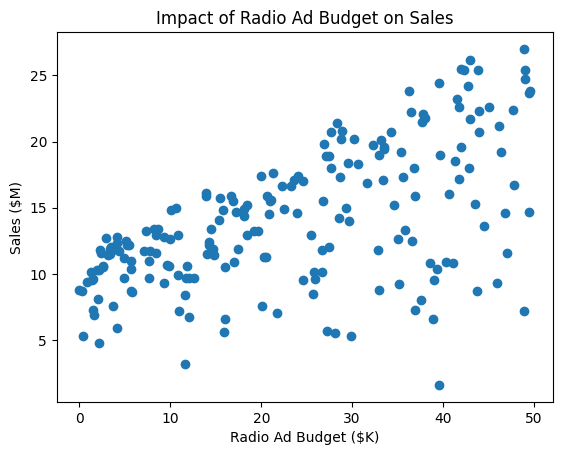

In [15]:

plt.scatter(data['Radio Ad Budget ($)'],data['Sales ($)'])
plt.xlabel('Radio Ad Budget ($K)')
plt.ylabel('Sales ($M)')
plt.title('Impact of Radio Ad Budget on Sales')
plt.show()

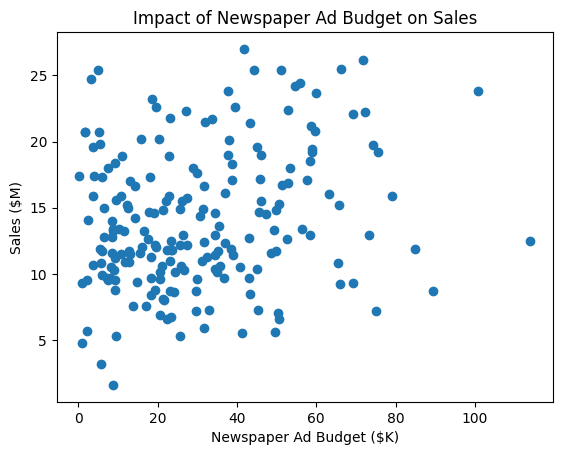

In [16]:

plt.scatter(data['Newspaper Ad Budget ($)'],data['Sales ($)'])
plt.xlabel('Newspaper Ad Budget ($K)')
plt.ylabel('Sales ($M)')
plt.title('Impact of Newspaper Ad Budget on Sales')
plt.show()

Text(0.5, 1.0, 'Impact of Medium of Ad on Sales')

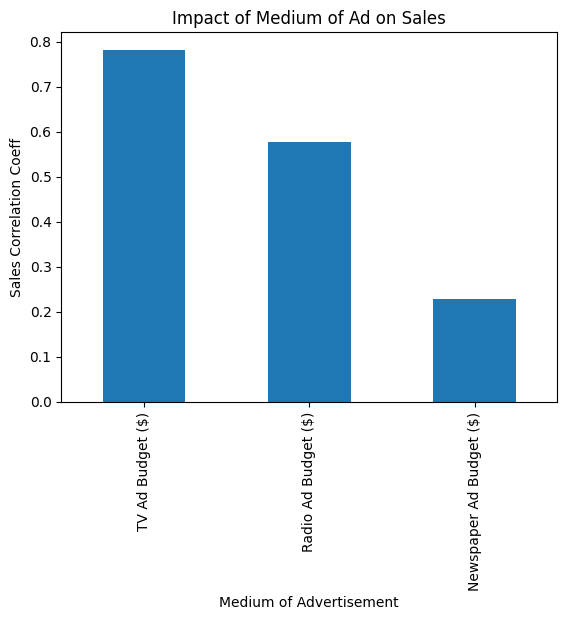

In [17]:

data.corr()['Sales ($)'][:3].plot(kind='bar')
plt.xlabel('Medium of Advertisement')
plt.ylabel('Sales Correlation Coeff')
plt.title('Impact of Medium of Ad on Sales')

# Feature Selection

In [19]:
x=data.drop(columns='Sales ($)')
y=data['Sales ($)']

In [20]:

print(x.ndim)
print(x.size)

2
600


In [21]:
#Dimension and size of x
print(y.ndim)
print(y.size)

1
200


# Train & Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train,x_test,y_train,y_test

(     TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)
 79              116.0                  7.7                     23.1
 197             177.0                  9.3                      6.4
 38               43.1                 26.7                     35.1
 24               62.3                 12.6                     18.3
 122             224.0                  2.4                     15.6
 ..                ...                  ...                      ...
 106              25.0                 11.0                     29.7
 14              204.1                 32.9                     46.0
 92              217.7                 33.5                     59.0
 179             165.6                 10.0                     17.6
 102             280.2                 10.1                     21.4
 
 [160 rows x 3 columns],
      TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)
 95              163.3                 31.6                     52.9
 15    

# Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

# Predictions and Model Evaluation using Test Data

In [27]:
y_pred_test=lr.predict(x_test)

In [29]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred_test))

Mean Absolute Error:  1.4607567168117603
Mean Squared Error:  3.1740973539761033
Root Mean Squared Error:  1.78159966153345
R2 Score:  0.899438024100912


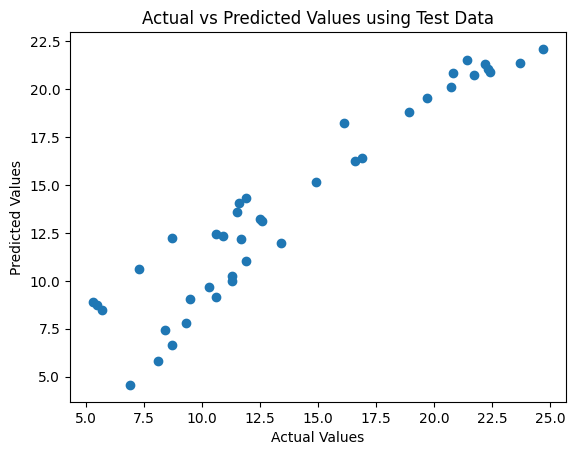

In [30]:
#Scatter plot to depict Actual vs Predicted Values
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted Values using Test Data')
plt.show()

# Predictions and Model Evaluation using Training Data

In [31]:
y_pred_train=lr.predict(x_train)

In [33]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error: ",metrics.mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print("R2 Score: ",metrics.r2_score(y_train,y_pred_train))

Mean Absolute Error:  1.1984678961500137
Mean Squared Error:  2.705129423081414
Root Mean Squared Error:  1.644727765644337
R2 Score:  0.8957008271017818


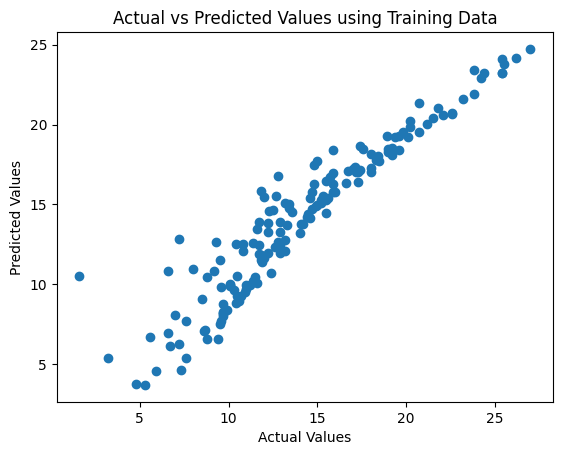

In [34]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted Values using Training Data')
plt.show()

# Trying multiple linear regression with different test size and random state and predictors

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [37]:
x_train,x_test,y_train,y_test

(     TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)
 187             191.1                 28.7                     18.2
 46               89.7                  9.9                     35.7
 138              43.0                 25.9                     20.5
 195              38.2                  3.7                     13.8
 108              13.1                  0.4                     25.6
 ..                ...                  ...                      ...
 67              139.3                 14.5                     10.2
 192              17.2                  4.1                     31.6
 117              76.4                  0.8                     14.8
 47              239.9                 41.5                     18.5
 172              19.6                 20.1                     17.0
 
 [120 rows x 3 columns],
      TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)
 18               69.2                 20.5                     18.3
 170   

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

# Predictions and Model Evaluation using Test Data

In [40]:
y_pred_test=lr.predict(x_test)

In [41]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred_test))

Mean Absolute Error:  1.1234254447154512
Mean Squared Error:  2.9569270836452937
Root Mean Squared Error:  1.719571773333493
R2 Score:  0.8876696235952205


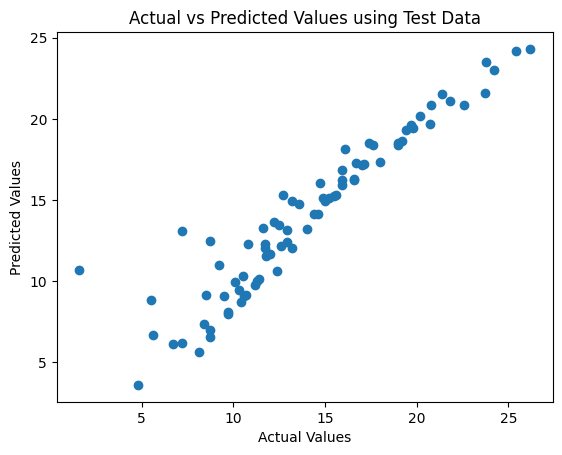

In [42]:

plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted Values using Test Data')
plt.show()

# Predictions and Model Evaluation using Training Data

In [44]:
y_pred_train=lr.predict(x_train)

In [45]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error: ",metrics.mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print("R2 Score: ",metrics.r2_score(y_train,y_pred_train))

Mean Absolute Error:  1.338709390516054
Mean Squared Error:  2.744121402781003
Root Mean Squared Error:  1.6565389831757666
R2 Score:  0.9005511298841222


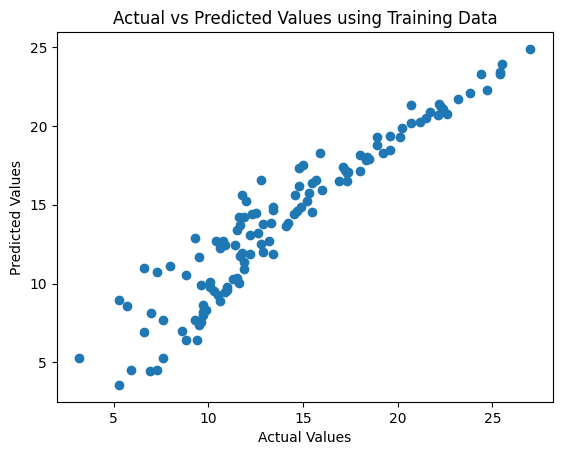

In [46]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted Values using Training Data')
plt.show()

# POLYNOMIAL REGRESSION ON 1 PREDICTOR AND SUBSET OF PREDICTORS

Root Mean Squared Error (Train - TV): 3.225778851316021
Root Mean Squared Error (Test - TV): 3.1654539086290416
Root Mean Squared Error (Train - All Predictors): 0.6003304710491733
Root Mean Squared Error (Test - All Predictors): 0.6425809120553604


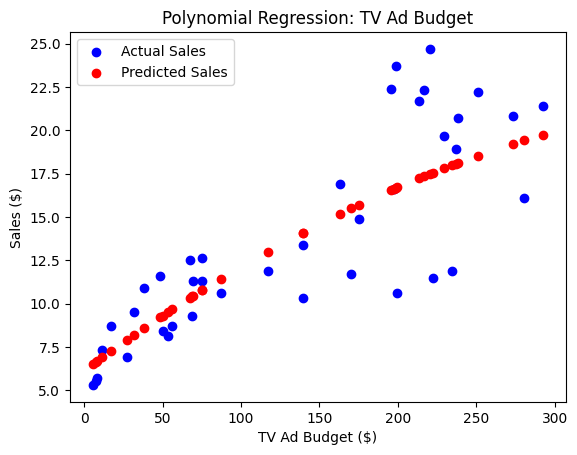

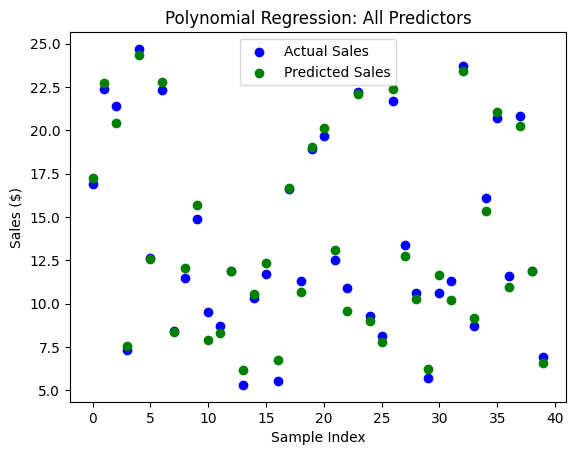

In [48]:
from sklearn.preprocessing import PolynomialFeatures

data = df.rename(columns=lambda x: x.strip())

X = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = data['Sales ($)']


X_tv = X[['TV Ad Budget ($)']]
X_train_tv, X_test_tv, y_train, y_test = train_test_split(X_tv, y, test_size=0.2, random_state=42)

poly_features_tv = PolynomialFeatures(degree=2, include_bias=False)
X_train_tv_poly = poly_features_tv.fit_transform(X_train_tv)
X_test_tv_poly = poly_features_tv.transform(X_test_tv)

model_tv = LinearRegression()
model_tv.fit(X_train_tv_poly, y_train)

y_pred_train_tv = model_tv.predict(X_train_tv_poly)
y_pred_tv = model_tv.predict(X_test_tv_poly)
print("Root Mean Squared Error (Train - TV):", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_tv)))
print("Root Mean Squared Error (Test - TV):", np.sqrt(metrics.mean_squared_error(y_test, y_pred_tv)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features_all = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features_all.fit_transform(X_train)
X_test_poly = poly_features_all.transform(X_test)

model_all = LinearRegression()
model_all.fit(X_train_poly, y_train)

y_pred_train_all = model_all.predict(X_train_poly)
y_pred_all = model_all.predict(X_test_poly)
print("Root Mean Squared Error (Train - All Predictors):", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_all)))
print("Root Mean Squared Error (Test - All Predictors):", np.sqrt(metrics.mean_squared_error(y_test, y_pred_all)))


plt.scatter(X_test_tv, y_test, color='blue', label='Actual Sales')
plt.scatter(X_test_tv, y_pred_tv, color='red', label='Predicted Sales')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Polynomial Regression: TV Ad Budget')
plt.legend()
plt.show()

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.scatter(range(len(y_test)), y_pred_all, color='green', label='Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales ($)')
plt.title('Polynomial Regression: All Predictors')
plt.legend()
plt.show()


# Changing the degree to see the accuracy (the accuracy decreases in our case)

Root Mean Squared Error (Train - All Predictors): 0.36841268311155334
Root Mean Squared Error (Test - All Predictors): 0.786098672945852


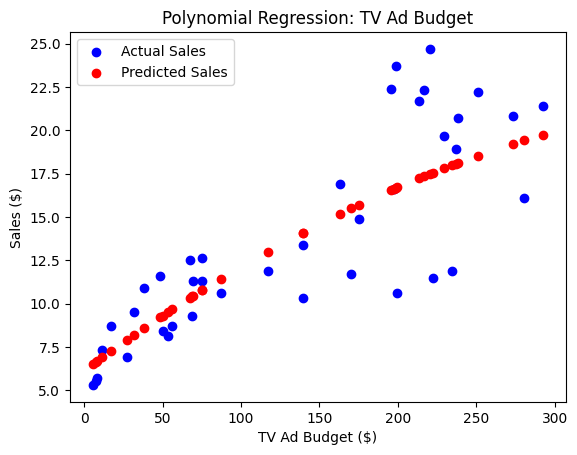

In [49]:
poly_features_all = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly_features_all.fit_transform(X_train)
X_test_poly = poly_features_all.transform(X_test)

model_all = LinearRegression()
model_all.fit(X_train_poly, y_train)

y_pred_train_all = model_all.predict(X_train_poly)
y_pred_all = model_all.predict(X_test_poly)
print("Root Mean Squared Error (Train - All Predictors):", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_all)))
print("Root Mean Squared Error (Test - All Predictors):", np.sqrt(metrics.mean_squared_error(y_test, y_pred_all)))

# Visualization for TV Ad Budget
plt.scatter(X_test_tv, y_test, color='blue', label='Actual Sales')
plt.scatter(X_test_tv, y_pred_tv, color='red', label='Predicted Sales')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Polynomial Regression: TV Ad Budget')
plt.legend()
plt.show()